<a href="https://colab.research.google.com/github/AnoushkaTripathi/Dimensionality-Reduction-with-LDA/blob/main/Lab_02b_Linear_Regression_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files.upload()

KeyboardInterrupt: 

In [3]:
data = pd.read_csv("/content/ex1data2.csv", names=["Size", "Bedrooms", "Price"])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data = (data - data.mean())/data.std()

In [5]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

y.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [7]:
X.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [8]:
X = np.matrix(X)
y = np.matrix(y)

theta = np.matrix(np.array([1,1,1]))
theta

matrix([[1, 1, 1]])

In [9]:
X.shape, theta.shape, y.shape

((47, 3), (1, 3), (47, 1))

In [10]:
def computeCost(X, y, theta):
  inner = np.power(((X*(np.transpose(theta))) - y), 2)
  cost = np.sum(inner)/ (2*(X.shape[0]))
  return (cost/1)

In [11]:
computeCost(X, y, theta)

1.246490441338071

In [12]:
def gradientDescent(X, y, theta, alpha, iters):

  # a = np.sum(((X*(np.transpose(theta))) - y)*X)*(alpha/(X.shape[0]))
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])

  Cost = np.zeros(iters)
  for i in range(iters):
    error = (X*theta.T) - y
    for j in range(parameters):
      term = np.multiply(error, X[:, j])
      temp[0, j] = theta[0, j] - ((alpha/len(X))*np.sum(term))
    theta = temp
    Cost[i] = computeCost(X, y, theta)
  return theta , Cost

In [13]:
alpha= 0.01
iters = 100
Theta, C = gradientDescent(X, y, theta, alpha, iters)
computeCost(X, y, Theta), Theta

(0.2616480695207345, matrix([[0.36603234, 0.70560738, 0.37682847]]))

Text(0.5, 1.0, 'Error vs. Training Epoch')

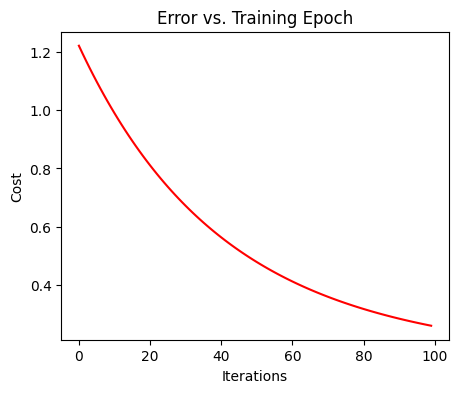

In [15]:

fig,ax=plt.subplots(figsize=(5,4))
ax.plot(np.arange(iters),C,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
